In [257]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt

# **Informacion toal de Equipos**

In [258]:
df = pd.read_csv('../../Datasett/equipos.csv')

#### Graficos

# **Informacion de equipos en la temorada 2023 - 2024**

In [259]:
# Cargar el archivo CSV
df_team = pd.read_csv('../../Datasett/TeamSeason23_24.csv')
df_team.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Indiana Pacers,82,19705,3855,7599,0.507,1082,2891,0.374,2773,...,0.782,827,2578,3405,2522,631,481,1059,1756,10110
1,Boston Celtics,82,19830,3601,7396,0.487,1351,3482,0.388,2250,...,0.807,876,2923,3799,2207,557,538,979,1326,9887
2,Oklahoma City Thunder,82,19805,3653,7324,0.499,1090,2805,0.389,2563,...,0.825,722,2725,3447,2223,694,538,1039,1545,9847
3,Milwaukee Bucks,82,19805,3538,7258,0.487,1163,3122,0.373,2375,...,0.774,772,2850,3622,2176,558,413,1059,1574,9756
4,Atlanta Hawks,82,19855,3529,7584,0.465,1125,3092,0.364,2404,...,0.797,1024,2639,3663,2180,615,369,1110,1522,9703


### Informacion Columnas:

- **Rk**: Rango
- **G**: Juegos Jugados
- **MP**: Minutos Jugados
- **FG**: Canastas de Campo
- **FGA**: Intentos de Canasta de Campo
- **FG%**: Porcentaje de Canastas de Campo
- **3P**: Triples Encestados
- **3PA**: Intentos de Triple
- **3P%**: Porcentaje de Triples
- **2P**: Dobles Encestados
- **2PA**: Intentos de Dobles
- **2P%**: Porcentaje de Dobles
- **FT**: Tiros Libres Encestados
- **FTA**: Intentos de Tiro Libre
- **FT%**: Porcentaje de Tiros Libres
- **ORB**: Rebotes Ofensivos
- **DRB**: Rebotes Defensivos
- **TRB**: Rebotes Totales
- **AST**: Asistencias
- **STL**: Robos
- **BLK**: Bloqueos
- **TOV**: Pérdidas de Balón
- **PF**: Faltas Personales
- **PTS**: Puntos


In [260]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    30 non-null     object 
 1   G       30 non-null     int64  
 2   MP      30 non-null     int64  
 3   FG      30 non-null     int64  
 4   FGA     30 non-null     int64  
 5   FG%     30 non-null     float64
 6   3P      30 non-null     int64  
 7   3PA     30 non-null     int64  
 8   3P%     30 non-null     float64
 9   2P      30 non-null     int64  
 10  2PA     30 non-null     int64  
 11  2P%     30 non-null     float64
 12  FT      30 non-null     int64  
 13  FTA     30 non-null     int64  
 14  FT%     30 non-null     float64
 15  ORB     30 non-null     int64  
 16  DRB     30 non-null     int64  
 17  TRB     30 non-null     int64  
 18  AST     30 non-null     int64  
 19  STL     30 non-null     int64  
 20  BLK     30 non-null     int64  
 21  TOV     30 non-null     int64  
 22  PF  

### Modificacion de datasett

In [261]:
# Crear columna PTS_por_juego
df_team['PTS_por_juego'] = df_team['PTS'] / 82
df_team['PTS_por_juego'] = df_team['PTS_por_juego'].astype(int)

df_team = df_team.sort_values(by='PTS_por_juego', ascending=False)

df_team.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS_por_juego
0,Indiana Pacers,82,19705,3855,7599,0.507,1082,2891,0.374,2773,...,827,2578,3405,2522,631,481,1059,1756,10110,123
2,Oklahoma City Thunder,82,19805,3653,7324,0.499,1090,2805,0.389,2563,...,722,2725,3447,2223,694,538,1039,1545,9847,120
1,Boston Celtics,82,19830,3601,7396,0.487,1351,3482,0.388,2250,...,876,2923,3799,2207,557,538,979,1326,9887,120
3,Milwaukee Bucks,82,19805,3538,7258,0.487,1163,3122,0.373,2375,...,772,2850,3622,2176,558,413,1059,1574,9756,118
4,Atlanta Hawks,82,19855,3529,7584,0.465,1125,3092,0.364,2404,...,1024,2639,3663,2180,615,369,1110,1522,9703,118


In [262]:
# cambiar el nombre de la columna
df_team = df_team.rename(columns={"Team": "equipo"})

### Grafico

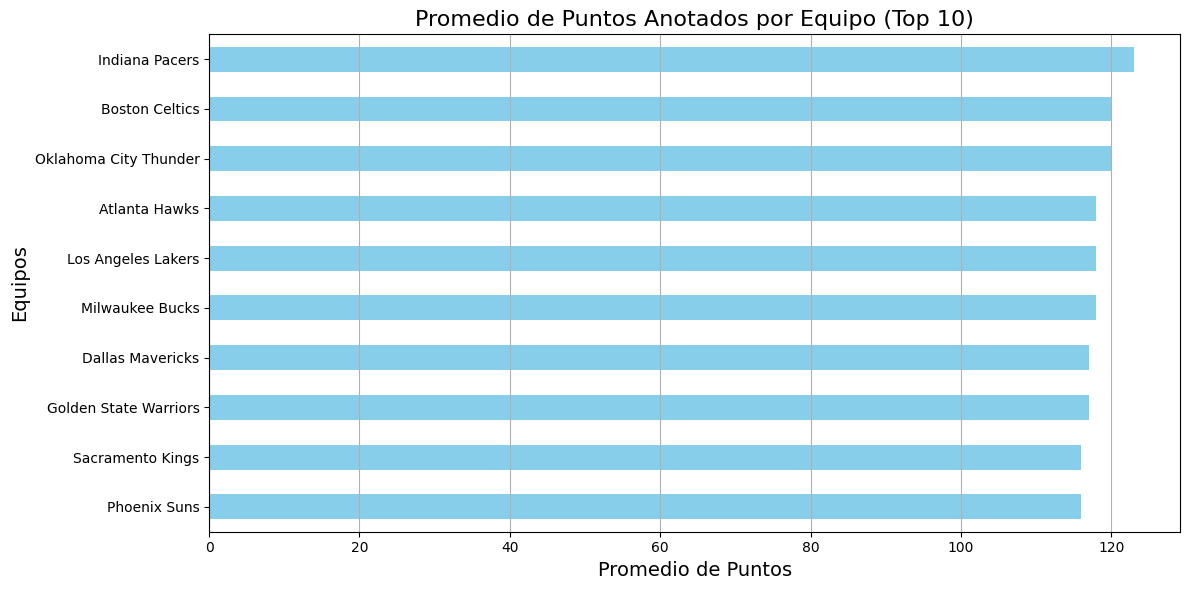

In [263]:
# Promedio de puntos por equipo
avg_pts = df_team.groupby('equipo')['PTS_por_juego'].mean().sort_values()

top_10_avg_pts = avg_pts.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
top_10_avg_pts.plot(kind='barh', color='skyblue')

plt.title('Promedio de Puntos Anotados por Equipo (Top 10)', fontsize=16)
plt.xlabel('Promedio de Puntos', fontsize=14)
plt.ylabel('Equipos', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


### Guarda nuevo archivo 

In [264]:
df_team[['equipo', 'PTS_por_juego']].to_csv('../../Datasett/EquiposTemporada23_24.csv', index=False)

# **Informacion de jugadores en la temorada 2023 - 2024**

In [265]:
# Cargar el archivo CSV especificando la codificación y el separador ;
df_players = pd.read_csv('../../Datasett/PlayerSeason23_24.csv', encoding='latin1')
df_players.head()



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


### Informacion Columnas:

- **Rk** : Rango
- **Player** : Nombre del jugador
- **Pos** : Posición
- **Age** : Edad del jugador
- **Tm** : Equipo
- **G** : Juegos jugados
- **GS** : Juegos iniciados
- **MP** : Minutos jugados por juego
- **FG** : Canastas de campo por juego
- **FGA** : Intentos de canasta de campo por juego
- **FG%** : Porcentaje de canastas de campo
- **3P** : Triples por juego
- **3PA** : Intentos de triple por juego
- **3P%** : Porcentaje de triples
- **2P** : Dobles por juego
- **2PA** : Intentos de dobles por juego
- **2P%** : Porcentaje de dobles
- **eFG%** : Porcentaje de tiro de campo efectivo
- **FT** : Tiros libres por juego
- **FTA** : Intentos de tiro libre por juego
- **FT%** : Porcentaje de tiros libres
- **ORB** : Rebotes ofensivos por juego
- **DRB** : Rebotes defensivos por juego
- **TRB** : Rebotes totales por juego
- **AST** : Asistencias por juego
- **STL** : Robos por juego
- **BLK** : Bloqueos por juego
- **TOV** : Pérdidas de balón por juego
- **PF** : Faltas personales por juego
- **PTS** : Puntos por juego


In [266]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

### Modificacion de datasett


### Grafico

# **Informacion de juegos en la temorada 2023 - 2024**

In [267]:
# Cargar el archivo CSV
df_games = pd.read_csv('../../Datasett/games.csv')
df_games.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,Tue Oct 24 2023,7:30p,Los Angeles Lakers,107,Denver Nuggets,119,Box Score,NaN,19842,2:17,Ball Arena,NaN
1,Tue Oct 24 2023,10:00p,Phoenix Suns,108,Golden State Warriors,104,Box Score,NaN,18064,2:33,Chase Center,NaN
2,Wed Oct 25 2023,7:00p,Houston Rockets,86,Orlando Magic,116,Box Score,NaN,18846,2:14,Kia Center,NaN
3,Wed Oct 25 2023,7:00p,Boston Celtics,108,New York Knicks,104,Box Score,NaN,19812,2:39,Madison Square Garden (IV),NaN
4,Wed Oct 25 2023,7:00p,Washington Wizards,120,Indiana Pacers,143,Box Score,NaN,16004,2:07,Gainbridge Fieldhouse,NaN


### Informacion Columnas:

In [268]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             54 non-null     object 
 1   Start (ET)       54 non-null     object 
 2   Visitor/Neutral  54 non-null     object 
 3   PTS              54 non-null     int64  
 4   Home/Neutral     54 non-null     object 
 5   PTS.1            54 non-null     int64  
 6   Unnamed: 6       54 non-null     object 
 7   Unnamed: 7       3 non-null      object 
 8   Attend.          54 non-null     int64  
 9   LOG              54 non-null     object 
 10  Arena            54 non-null     object 
 11  Notes            0 non-null      float64
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


### Modificacion de datasett

#### Equipo Local

In [269]:
# crear df de equuipos locales
df_gamesLocal = df_games[['Date', 'Home/Neutral', 'PTS.1']]

In [270]:
# cambiar de nombre a las columnas de df_gamesLocal
df_gamesLocal = df_gamesLocal.rename(columns={'Date': 'fecha', 'Home/Neutral': 'equipo', 'PTS.1': 'PTS'})
df_gamesLocal.head()

,fecha,equipo,PTS
0,Tue Oct 24 2023,Denver Nuggets,119
1,Tue Oct 24 2023,Golden State Warriors,104
2,Wed Oct 25 2023,Orlando Magic,116
3,Wed Oct 25 2023,New York Knicks,104
4,Wed Oct 25 2023,Indiana Pacers,143


#### Equipo Visita

In [271]:
# crear df de equipos visitas
df_gamesVisita = df_games[['Date', 'Visitor/Neutral', 'PTS']]

In [272]:
# cambiar de nombre a las columnas de 
df_gamesVisita = df_gamesVisita.rename(columns={'Date': 'fecha', 'Visitor/Neutral': 'equipo', 'PTS': 'PTS'})
df_gamesVisita2 = df_gamesVisita.rename(columns={'Date': 'fecha', 'Visitor/Neutral': 'equipo', 'PTS': 'PTS'})
df_gamesVisita.head()

,fecha,equipo,PTS
0,Tue Oct 24 2023,Los Angeles Lakers,107
1,Tue Oct 24 2023,Phoenix Suns,108
2,Wed Oct 25 2023,Houston Rockets,86
3,Wed Oct 25 2023,Boston Celtics,108
4,Wed Oct 25 2023,Washington Wizards,120


#### Crear nuevo datasett

In [273]:
# nuevo df con los equipos locales y visitantes
result = pd.concat([df_gamesLocal, df_gamesVisita], ignore_index=True)

In [274]:
# Ordenar Dataset por la columna Fecha
result['fecha'] = pd.to_datetime(result['fecha'])
df = result.sort_values(by='fecha')

df

,fecha,equipo,PTS
0,2023-10-24,Denver Nuggets,119
1,2023-10-24,Golden State Warriors,104
55,2023-10-24,Phoenix Suns,108
54,2023-10-24,Los Angeles Lakers,107
58,2023-10-25,Washington Wizards,120
...,...,...,...
53,2023-10-31,Los Angeles Clippers,118
52,2023-10-31,Phoenix Suns,114
51,2023-10-31,Cleveland Cavaliers,91
106,2023-10-31,San Antonio Spurs,115


In [275]:
# Crear un DataFrame con la suma acumulada de puntos por equipo
df['PTS_acumulados'] = df.groupby('equipo')['PTS'].cumsum()

### Grafico


Problemas

serian muchas fechas? como solucionarlo? = se soluciona solo

serian muchos equipos = recortar la cantidad de equipos 

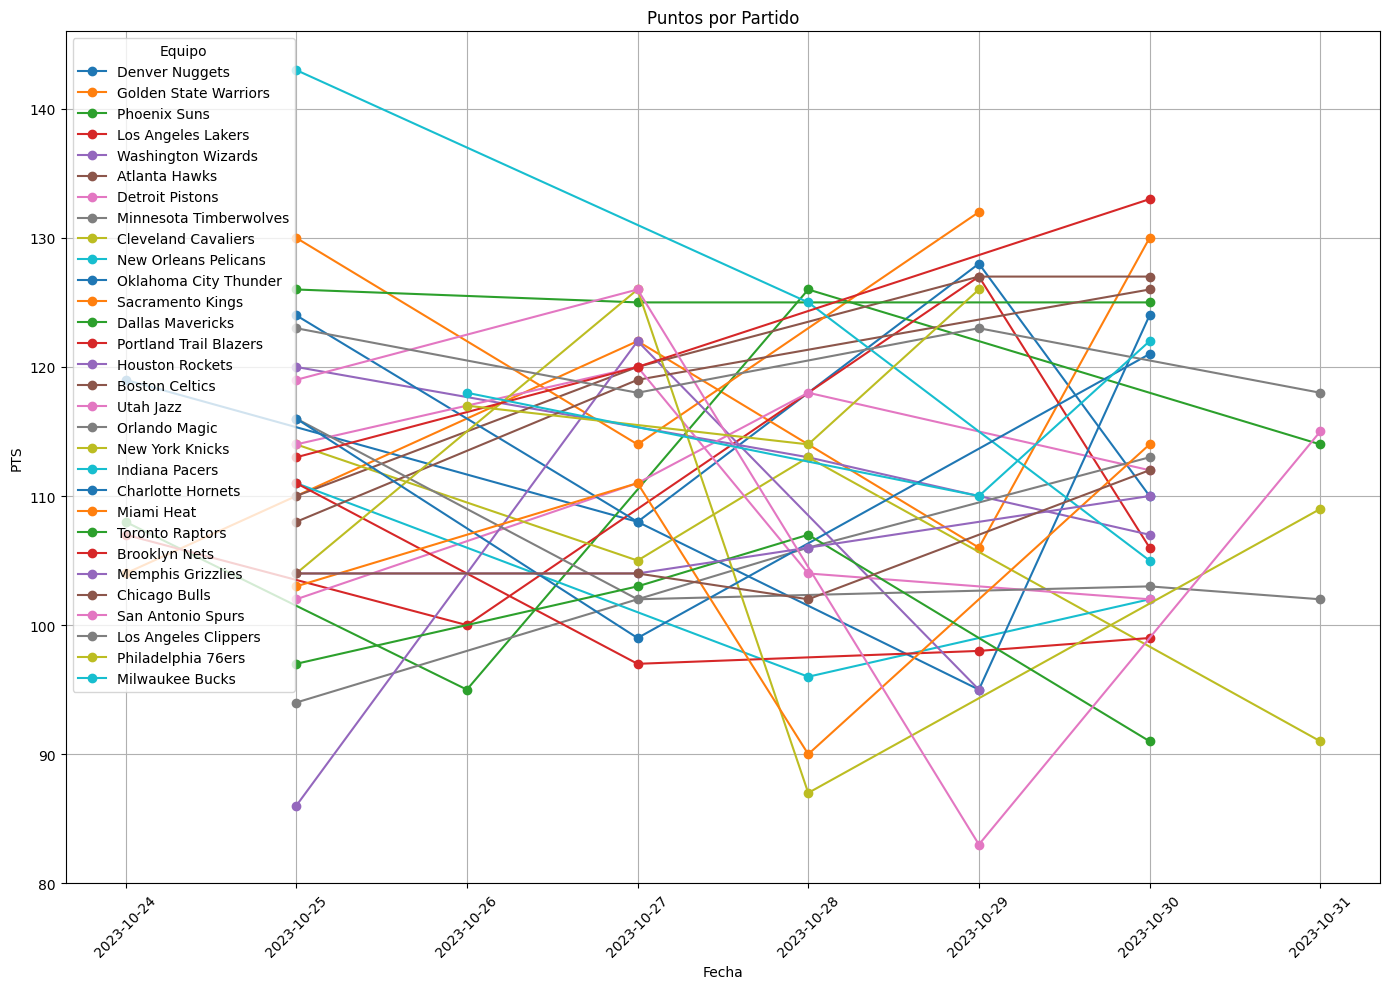

In [281]:
# Graficar por equipo
plt.figure(figsize=(14, 10))
for equipo in df['equipo'].unique():
    equipo_data = df[df['equipo'] == equipo]
    plt.plot(equipo_data['fecha'], equipo_data['PTS'], label=equipo, marker='o')

# Personalización del gráfico
plt.title('Puntos por Partido')
plt.xlabel('Fecha')
plt.ylabel('PTS')
plt.legend(title='Equipo')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

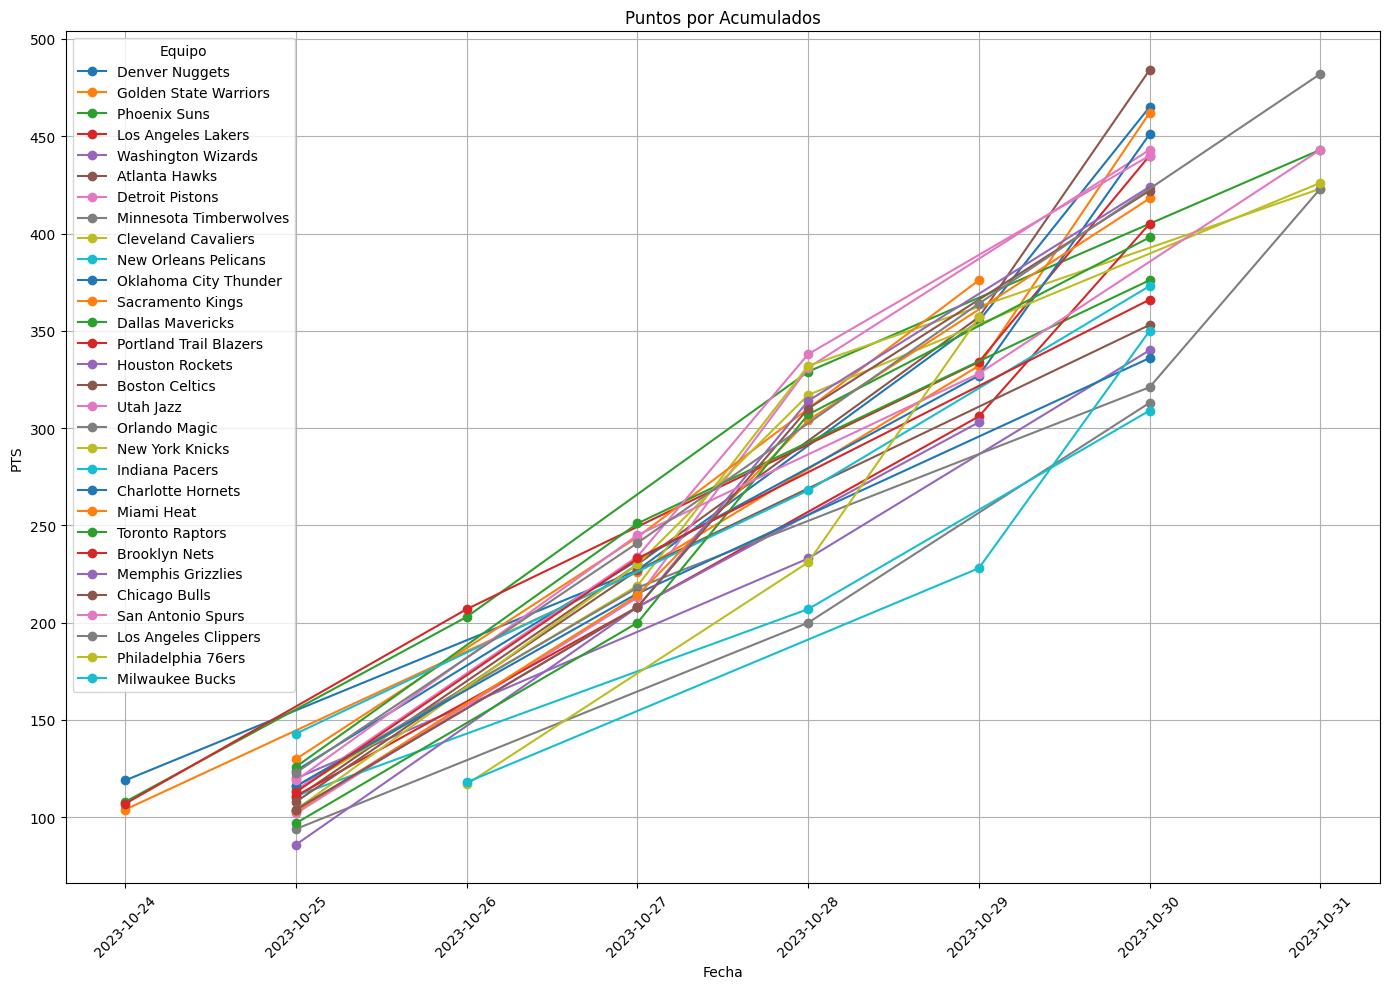

In [280]:
# Graficar por equipo
plt.figure(figsize=(14, 10))

for equipo in df['equipo'].unique():
    equipo_data = df[df['equipo'] == equipo]
    plt.plot(equipo_data['fecha'], equipo_data['PTS_acumulados'], label=equipo, marker='o')

# Personalización del gráfico
plt.title('Puntos por Acumulados')
plt.xlabel('Fecha')
plt.ylabel('PTS')
plt.legend(title='Equipo')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Guarda nuevo archivo 

In [278]:
df.to_csv('../../Datasett/juegos.csv', index=False)